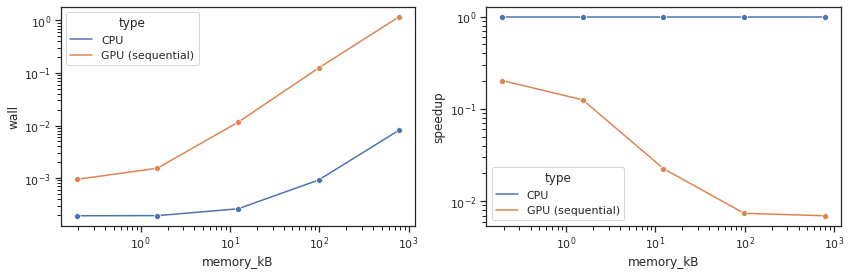

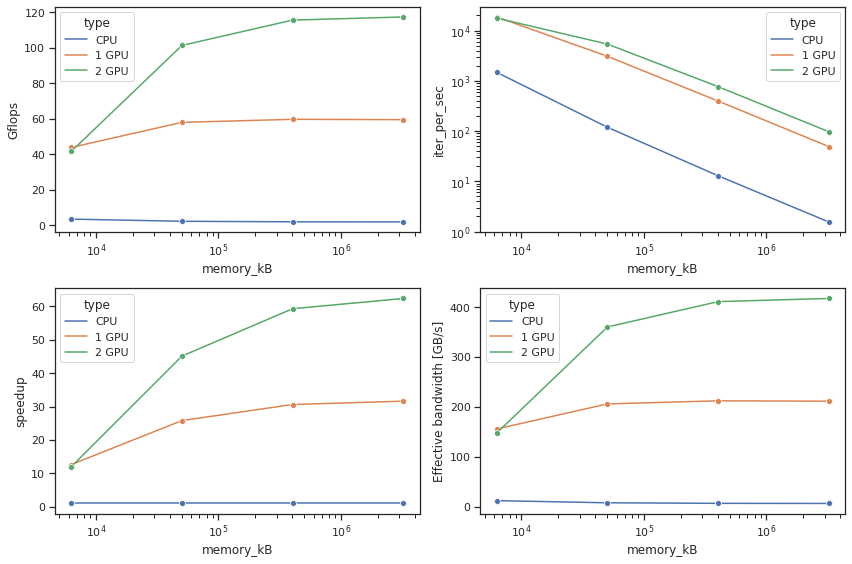

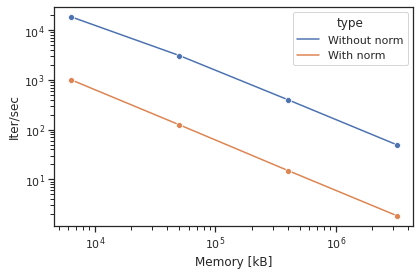

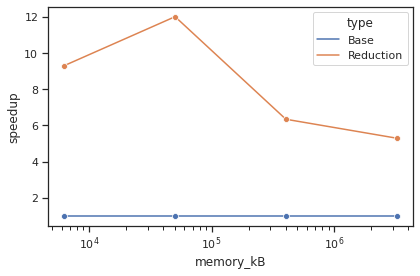

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="ticks", context="notebook")

FIGURE_FOLDER = "figures/"
DATA_FOLDER = "experiments/"

BANDWIDTH_COL = "Effective bandwidth [GB/s]"

def load_data(filename):
    iterations = 100
    double_size = 8
    data = pd.read_csv(filename ,delim_whitespace=True, header=None, names=["N", "wall"])
    data["memory_B"] = 3*data["N"]**3*double_size
    data["memory_kB"] = data["memory_B"]*1e-3
    data["memory_MB"] = data["memory_B"]*1e-6
    data["memory_GB"] = data["memory_B"]*1e-9
    data["iter_per_sec"] = iterations / data["wall"]
    data[BANDWIDTH_COL] = data["N"]**3 * double_size * 4 * data["iter_per_sec"] * 1e-9
    data["flops"] = 9*iterations*data["N"]**3/data["wall"]  # 6 flop to update each point
    data["Mflops"] = data["flops"]*1e-6
    data["Gflops"] = data["flops"]*1e-9
    # data["speedup"] = [data.query(f"threads == 1 and N == {row.N}")["wall"].item()/row["wall"] for i, row in data.iterrows()]
    return data

def plot_part5():
    data_seq_gpu = load_data("poisson_v1/" + DATA_FOLDER + "gpu_sequential.txt")
    data_seq_gpu["type"] = "GPU (sequential)"
    data_cpu = load_data("cpu/" + DATA_FOLDER + "cpu.txt").query("N < 64").reset_index()
    data_cpu["type"] = "CPU"
    data_seq_gpu["speedup"] = data_cpu["wall"] / data_seq_gpu["wall"]
    data_cpu["speedup"] = 1

    data = pd.concat((data_cpu, data_seq_gpu), ignore_index=True)

    fig, axs = plt.subplots(figsize=(12, 4), ncols=2)

    ax = axs[0]
    ax = sns.lineplot(data=data, x="memory_kB", y="wall", hue="type", marker="o", ax=ax)
    ax.set_xscale("log", base=10)
    ax.set_yscale("log", base=10)

    ax = axs[1]
    ax = sns.lineplot(data=data, x="memory_kB", y="speedup", hue="type", marker="o", ax=ax)
    ax.set_xscale("log", base=10)
    ax.set_yscale("log", base=10)

    fig.tight_layout()
    plt.show()
    # fig.savefig(FIGURE_FOLDER + plot_file, dpi=500)



def plot_part6():
    data_cpu = load_data("cpu/" + DATA_FOLDER + "cpu.txt").query("N >= 64").reset_index()
    data_cpu["type"] = "CPU"
    data_cpu["speedup"] = 1
    # data_seq_gpu = load_data("poisson_v1/" + DATA_FOLDER + "gpu_sequential.txt")
    # data_seq_gpu["type"] = "GPU (sequential)"
    # data_seq_gpu["speedup"] = data_cpu["wall"] / data_seq_gpu["wall"]
    data_1gpu = load_data("poisson_v2/" + DATA_FOLDER + "1gpu.txt")
    data_1gpu["type"] = "1 GPU"
    data_1gpu["speedup"] = data_cpu["wall"] / data_1gpu["wall"]
    data_2gpu = load_data("poisson_v3/" + DATA_FOLDER + "2gpu.txt")
    data_2gpu["type"] = "2 GPU"
    data_2gpu["speedup"] = data_cpu["wall"] / data_2gpu["wall"]

    data = pd.concat((data_cpu, data_1gpu, data_2gpu), ignore_index=True)

    fig, axs = plt.subplots(figsize=(12, 8), ncols=2, nrows=2)

    ax = axs[0,0]
    ax = sns.lineplot(data=data, x="memory_kB", y="Gflops", hue="type", marker="o", ax=ax)
    ax.set_xscale("log", base=10)
    # ax.set_yscale("log", base=10)

    ax = axs[0,1]
    ax = sns.lineplot(data=data, x="memory_kB", y="iter_per_sec", hue="type", marker="o", ax=ax)
    ax.set_xscale("log", base=10)
    ax.set_yscale("log", base=10)

    ax = axs[1,0]
    ax = sns.lineplot(data=data, x="memory_kB", y="speedup", hue="type", marker="o", ax=ax)
    ax.set_xscale("log", base=10)

    ax = axs[1,1]
    ax = sns.lineplot(data=data, x="memory_kB", y=BANDWIDTH_COL, hue="type", marker="o", ax=ax)
    ax.set_xscale("log", base=10)

    fig.tight_layout()
    plt.show()
    # fig.savefig(FIGURE_FOLDER + plot_file, dpi=500)

def plot_part8():
    data_base = load_data("poisson_v2/" + DATA_FOLDER + "1gpu.txt")
    data_base["type"] = "Without norm"
    data_base["speedup"] = 1
    data_norm = load_data("poisson_v2_norm/" + DATA_FOLDER + "1gpu_norm.txt")
    data_norm["type"] = "With norm"
    data_norm["speedup"] = data_base["wall"] / data_norm["wall"]

    data = pd.concat((data_base, data_norm), ignore_index=True)

    fig, ax = plt.subplots(figsize=(6, 4), ncols=1, nrows=1)

    ax = sns.lineplot(data=data, x="memory_kB", y="iter_per_sec", hue="type", marker="o", ax=ax)
    ax.set_xscale("log", base=10)
    ax.set_yscale("log", base=10)
    ax.set(
        ylabel="Iter/sec",
        xlabel="Memory [kB]",
    )
    fig.tight_layout()
    plt.show()

    data_norm = load_data("poisson_v2_norm/" + DATA_FOLDER + "1gpu_norm.txt")
    data_norm["type"] = "Base"
    data_norm["speedup"] = 1
    data_reduce = load_data("poisson_v4_norm/" + DATA_FOLDER + "reduce_norm.txt")
    data_reduce["type"] = "Reduction"
    data_reduce["speedup"] = data_norm["wall"] / data_reduce["wall"]

    data = pd.concat((data_norm, data_reduce), ignore_index=True)

    fig, ax = plt.subplots(figsize=(6, 4), ncols=1, nrows=1)

    # ax = axs[0]
    # ax = sns.lineplot(data=data, x="memory_kB", y="Gflops", hue="type", marker="o", ax=ax)
    # ax.set_xscale("log", base=10)
    # ax = axs[1]
    ax = sns.lineplot(data=data, x="memory_kB", y="speedup", hue="type", marker="o", ax=ax)
    ax.set_xscale("log", base=10)
    fig.tight_layout()
    plt.show()

# def plot_part8():
#     data_norm = load_data("poisson_v2_norm/" + DATA_FOLDER + "1gpu_norm.txt")
#     data_norm["type"] = "With norm"
#     data_norm["speedup"] = 1
#     data_base = load_data("poisson_v2/" + DATA_FOLDER + "1gpu.txt")
#     data_base["type"] = "Without norm"
#     data_base["speedup"] = data_norm["wall"] / data_base["wall"]


#     data = pd.concat((data_base, data_norm), ignore_index=True)

#     fig, axs = plt.subplots(figsize=(12, 8), ncols=2, nrows=2)

#     ax = axs[0,0]
#     ax = sns.lineplot(data=data, x="memory_kB", y="Gflops", hue="type", marker="o", ax=ax)
#     ax.set_xscale("log", base=10)
#     ax.set_yscale("log", base=10)

#     ax = axs[0,1]
#     ax = sns.lineplot(data=data, x="memory_kB", y="iter_per_sec", hue="type", marker="o", ax=ax)
#     ax.set_xscale("log", base=10)
#     ax.set_yscale("log", base=10)

#     ax = axs[1,0]
#     ax = sns.lineplot(data=data, x="memory_kB", y="speedup", hue="type", marker="o", ax=ax)
#     ax.set_xscale("log", base=10)
#     ax.set_yscale("log", base=10)

#     ax = axs[1,1]
#     ax = sns.lineplot(data=data, x="memory_kB", y=BANDWIDTH_COL, hue="type", marker="o", ax=ax)
#     ax.set_xscale("log", base=10)
#     ax.set_yscale("log", base=10)

#     fig.tight_layout()
#     plt.show()

if __name__ == "__main__":
    plot_part5()
    plot_part6()
    plot_part8()
    